In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [10]:
df=pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [11]:
df.shape

(583, 11)

In [12]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [13]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [14]:
a=df["Albumin_and_Globulin_Ratio"].value_counts().sum()
b=583
print("Number of missing values in the dataset with **Albumin_and_Globulin_Ratio** as column ::",(b-a)/b*100)

Number of missing values in the dataset with **Albumin_and_Globulin_Ratio** as column :: 0.686106346484


In [15]:
dp=df.loc[pd.isna(df['Albumin_and_Globulin_Ratio']), :].index
dp

Int64Index([209, 241, 253, 312], dtype='int64')

In [16]:
df.drop(dp,axis=0,inplace=True)

In [17]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [18]:
df.shape

(579, 11)

In [19]:
df["Dataset"].value_counts()

1    414
2    165
Name: Dataset, dtype: int64

In [20]:
yes_survived=df.loc[df["Dataset"] == 1]
no_not_Survived=df.loc[df["Dataset"] == 2]

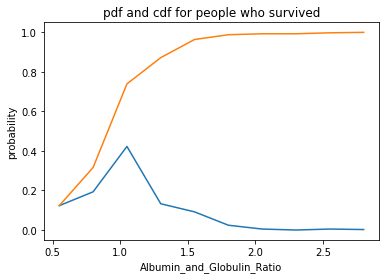

In [21]:
counts, bin_edges = np.histogram(yes_survived['Albumin_and_Globulin_Ratio'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("pdf and cdf for people who survived")

plt.xlabel("Albumin_and_Globulin_Ratio")
plt.ylabel("probability")
plt.show();

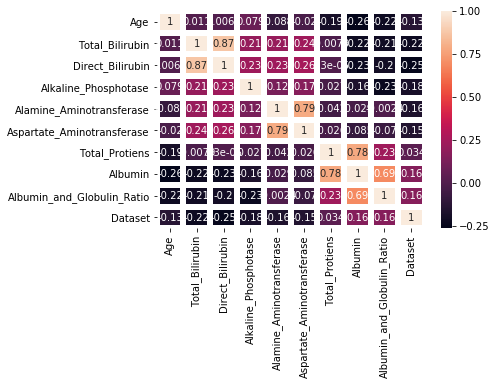

In [22]:
fig=plt.figure()
sns.heatmap(df.corr(),annot=True,linewidths=5)
plt.show()
fig.savefig("ssc.png")

In [23]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Total_Bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


In [24]:
x=df.iloc[:,0:10].values
y=df.iloc[:,10].values

In [25]:
x

array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
       [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
       [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
       ..., 
       [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
       [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
       [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [27]:
x[:,1]=lb.fit_transform(x[:,1])

In [28]:
x

array([[65, 0, 0.7, ..., 6.8, 3.3, 0.9],
       [62, 1, 10.9, ..., 7.5, 3.2, 0.74],
       [62, 1, 7.3, ..., 7.0, 3.3, 0.89],
       ..., 
       [52, 1, 0.8, ..., 6.4, 3.2, 1.0],
       [31, 1, 1.3, ..., 6.8, 3.4, 1.0],
       [38, 1, 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [29]:
df1=pd.DataFrame(x,columns=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'])
df2=pd.DataFrame(y,columns=["Status"])

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
y.shape

(579,)

In [32]:
x.shape

(579, 10)

In [33]:
bf=SelectKBest(score_func=chi2,k=10)
fit=bf.fit(df1,df2)

In [34]:
dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(df1.columns)

In [35]:
featscore=pd.concat([dfcolumns,dfscore],axis=1)
featscore.columns=["specs","score"]

In [36]:
featscore

,specs,score
0,Age,60.226677
1,Gender,0.926483
2,Total_Bilirubin,327.913058
3,Direct_Bilirubin,186.119776
4,Alkaline_Phosphotase,3956.690967
5,Alamine_Aminotransferase,6361.141943
6,Aspartate_Aminotransferase,10138.860197
7,Total_Protiens,0.118535
8,Albumin,2.966936
9,Albumin_and_Globulin_Ratio,1.658882


In [37]:
print(featscore.nlargest(10,'score'))

                        specs         score
6  Aspartate_Aminotransferase  10138.860197
5    Alamine_Aminotransferase   6361.141943
4        Alkaline_Phosphotase   3956.690967
2             Total_Bilirubin    327.913058
3            Direct_Bilirubin    186.119776
0                         Age     60.226677
8                     Albumin      2.966936
9  Albumin_and_Globulin_Ratio      1.658882
1                      Gender      0.926483
7              Total_Protiens      0.118535


In [38]:
df1.drop(["Albumin","Albumin_and_Globulin_Ratio","Total_Protiens"],axis=1,inplace=True)


In [39]:
df1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase
0,65,0,0.7,0.1,187,16,18
1,62,1,10.9,5.5,699,64,100
2,62,1,7.3,4.1,490,60,68
3,58,1,1,0.4,182,14,20
4,72,1,3.9,2,195,27,59


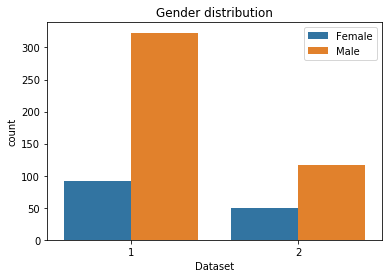

In [40]:
fif=plt.figure()
sns.countplot(data=df,x="Dataset",hue="Gender")
plt.legend()
plt.title("Gender distribution")
plt.show()
fif.savefig("sss.png")

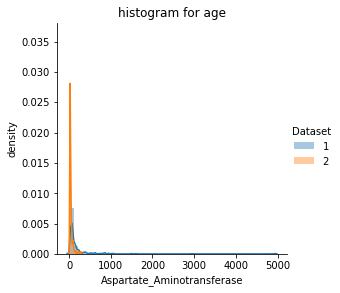

In [41]:
sns.FacetGrid(df, hue="Dataset", size=4) \
   .map(sns.distplot, "Aspartate_Aminotransferase") \
   .add_legend()
plt.title("histogram for age")
plt.ylabel("density")
plt.show()


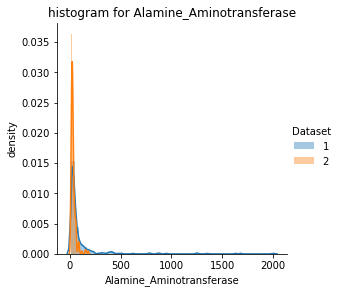

In [42]:
sns.FacetGrid(df, hue="Dataset", size=4) \
   .map(sns.distplot, "Alamine_Aminotransferase") \
   .add_legend()
plt.title("histogram for Alamine_Aminotransferase")
plt.ylabel("density")
plt.show()


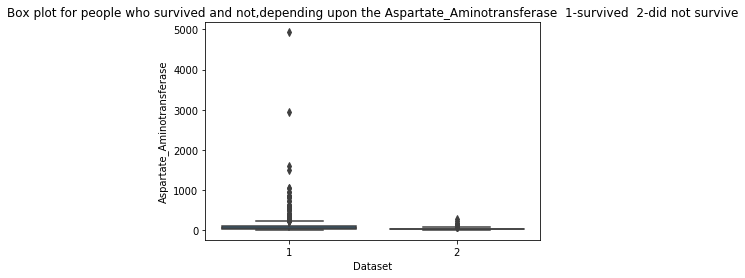

In [43]:

sns.boxplot(x='Dataset',y='Aspartate_Aminotransferase', data=df)
plt.title("box plot for Aspartate_Aminotransferase")
plt.title("Box plot for people who survived and not,depending upon the Aspartate_Aminotransferase  1-survived  2-did not survive")
plt.show()

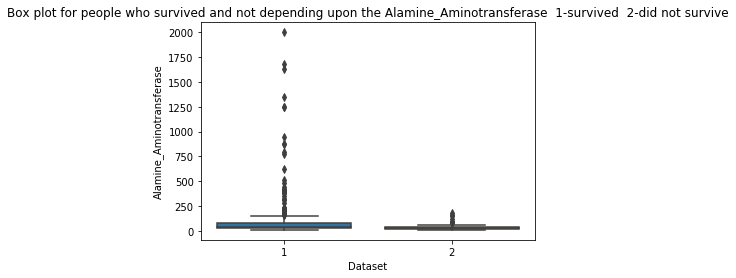

In [44]:

sns.boxplot(x='Dataset',y='Alamine_Aminotransferase', data=df)
plt.title("box plot for Aspartate_Aminotransferase")
plt.title("Box plot for people who survived and not depending upon the Alamine_Aminotransferase  1-survived  2-did not survive")
plt.show()

In [45]:
x=df1.iloc[:,:].values
y=df2.iloc[:,:].values

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
#print("X_train shape is",x_train.shape)
#print("X_test shape is",x_test.shape)
#print("Y_train shape is",y_train.shape)
#print("Y_test shape is",y_test.shape)

X_train shape is (463, 10)
X_test shape is (116, 10)
Y_train shape is (463,)
Y_test shape is (116,)


In [37]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

In [38]:
#x_train=sc.fit_transform(x_train)
#x_test=sc.transform(x_test)

In [39]:
#from sklearn.neighbors import KNeighborsClassifier


In [40]:
#k_range=range(1,50,2)
#knnscores=[]
#for k in k_range:
 #   knn=KNeighborsClassifier(n_neighbors=k)
  #  knn.fit(x_train,y_train)
  #  knnscores.append(knn.score(x_test,y_test))

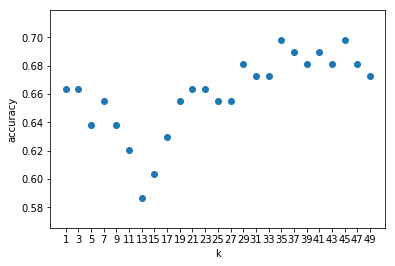

In [41]:
##plt.figure()
#plt.xlabel('k')
#plt.ylabel('accuracy')
#plt.scatter(k_range,knnscores)
#plt.xticks(k_range)
#plt.show()

In [42]:
#knn=KNeighborsClassifier(n_neighbors=5,p=2)


In [43]:
#knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
#y_pred_knn=knn.predict(x_test)

In [45]:
#y_test=lb.fit_transform(y_test)
#y_pred_knn=lb.transform(y_pred_knn)

In [46]:
'''from sklearn.model_selection import cross_val_score
knn= KNeighborsClassifier(n_neighbors=5)
cross_knn=cross_val_score(knn, df1, df2, cv=10, scoring ='accuracy').mean()
print(cross_knn)
'''

0.643932962154


In [47]:
#from sklearn.metrics import accuracy_score

In [48]:
''''''acc_knn=accuracy_score(y_test,y_pred_knn)
print("Accuracy Score:",acc_knn*100,"%")'''

'''

Accuracy Score: 63.7931034483 %


In [49]:

#from sklearn.metrics import confusion_matrix

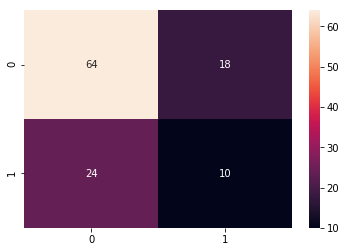

In [51]:
#fii=plt.figure()
#sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)
#fii.savefig("see.png")

In [54]:
#y_test=lb.fit_transform(y_test)
y_pred_knn=lb.transform(y_pred_knn)

In [55]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [56]:
y_pred_knn

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [57]:
import sklearn.metrics as metrics
fpr,tpr,threshold=(metrics.roc_curve(y_test,y_pred_knn))
roc_auc_knn=metrics.auc(fpr,tpr)

In [58]:
roc_auc_knn

0.75286944045911042

In [59]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()

In [60]:
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
y_pred_logistic=logr.predict(x_test)

In [62]:
acc_logr=accuracy_score(y_pred_logistic,y_test)
print("Accuracy Score:",acc_logr*100,"%")

Accuracy Score: 24.1379310345 %


In [63]:
import sklearn.metrics as metrics
fpr,tpr,threshold=(metrics.roc_curve(y_test,y_pred_logistic))
roc_auc_logr=metrics.auc(fpr,tpr)


In [64]:
roc_auc_logr

0.55774748923959827

In [65]:
from sklearn.model_selection import cross_val_score
cross_logr=cross_val_score(logr, df1, df2, cv=10, scoring ='accuracy').mean()
print(cross_logr)

0.725223784183


In [66]:
from sklearn.svm import SVC

In [67]:
model=SVC(kernel="linear")

In [68]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
y_pred_lsvm=model.predict(x_test)

In [70]:
acc_lsvm=accuracy_score(y_test,y_pred_lsvm)
print("Accuracy Score : ",acc_lsvm*100)

Accuracy Score :  29.3103448276


In [71]:
fpr,tpr,threshold=(metrics.roc_curve(y_test,y_pred_lsvm))
roc_auc_lsvm=metrics.auc(fpr,tpr)

In [72]:
roc_auc_lsvm

0.5

In [73]:
model_kernel=SVC(kernel="rbf")

In [74]:
model_kernel.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
y_pred_kernel=model_kernel.predict(x_test)

In [76]:
acc_kernel=accuracy_score(y_test,y_pred_kernel)
print("Accuracy Score : ",acc_kernel*100)

Accuracy Score :  29.3103448276


In [77]:
fpr,tpr,threshold=(metrics.roc_curve(y_test,y_pred_kernel))
roc_auc_kernel=metrics.auc(fpr,tpr)

In [78]:
roc_auc_kernel

0.5

In [79]:
#from sklearn.model_selection import cross_val_score
#print(cross_val_score(model, df1, df2, cv=10, scoring ='accuracy').mean())

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

NameError: name 'train_test_split' is not defined

In [105]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
y_pred_dt=dt.predict(x_test)

In [107]:
acc_dt=accuracy_score(y_test,y_pred_dt)
print("Accuracy Score:", acc_dt*100)

Accuracy Score: 65.5172413793


In [85]:
y_pred_dt=lb.fit_transform(y_pred_dt)
y_test=lb.transform(y_test)

In [86]:
import sklearn.metrics as metrics
fpr,tpr,threshold=(metrics.roc_curve(y_test,y_pred_dt))
roc_auc_dt=metrics.auc(fpr,tpr)

In [87]:
roc_auc_dt

0.62804878048780499

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf=RandomForestClassifier(n_estimators=100000,criterion='entropy',random_state=0)

In [49]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [111]:
y_pred_rf=rf.predict([[]])

In [112]:
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_test,y_pred_rf)
print("Accuracy Score:", acc_rf*100)

Accuracy Score: 69.8275862069


In [93]:
import sklearn.metrics as metrics
fpr,tpr,threshold=(metrics.roc_curve(y_test,y_pred_rf))
roc_auc_rf=metrics.auc(fpr,tpr)

In [94]:
roc_auc_rf

0.58859397417503589

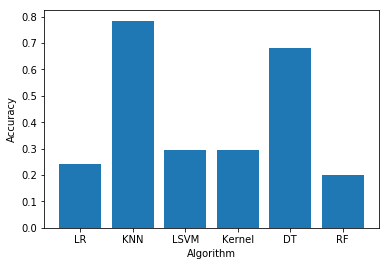

In [95]:
x=["LR","KNN","LSVM","Kernel","DT","RF"]
x2=[]
x2.append(acc_logr)
x2.append(acc_knn)
x2.append(acc_lsvm)
x2.append(acc_kernel)
x2.append(acc_dt)
x2.append(acc_rf)
plt.bar(x,x2)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()

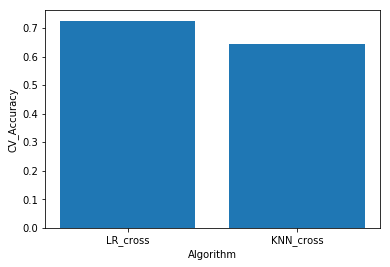

In [96]:
cross_val_x=["LR_cross","KNN_cross",]
x3=[]
x3.append(cross_logr)
x3.append(cross_knn)
plt.bar(cross_val_x,x3)
plt.xlabel("Algorithm")
plt.ylabel("CV_Accuracy")
plt.show()

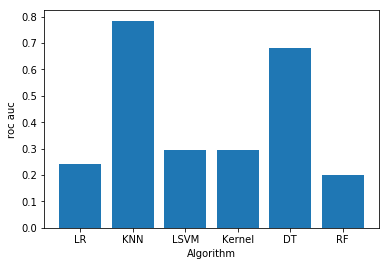

In [97]:
x=["LR","KNN","LSVM","Kernel","DT","RF"]
x4=[]
x4.append(roc_auc_logr)
x4.append(roc_auc_knn)
x4.append(roc_auc_lsvm)
x4.append(roc_auc_kernel)
x4.append(roc_auc_dt)
x4.append(roc_auc_rf)
plt.bar(x,x2)
plt.xlabel("Algorithm")
plt.ylabel("roc auc")
plt.show()